## Lab 21 | Time Series: Models Evaluation and Comparison

Download data

In [1]:
# Import yfinance
import yfinance as yf

# Import pandas
import pandas as pd

# Setup
import warnings
warnings.filterwarnings("ignore")

# Download the datafile from yfinance
data = yf.download("BTC-USD")[['Close']]
data.index = pd.to_datetime(data.index)
data.head().round(2)

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2014-09-17,457.33
2014-09-18,424.44
2014-09-19,394.80
2014-09-20,408.90
2014-09-21,398.82


In [2]:
data.shape

(2682, 1)

In [3]:
data.tail()

,Close
Date,
2022-01-15,43177.398438
2022-01-16,43113.878906
2022-01-17,42250.550781
2022-01-18,42375.632812
2022-01-19,42159.574219


Invesitgate Data - Draw the graphs 

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

Text(0.5, 1.0, 'Bitcoin price')

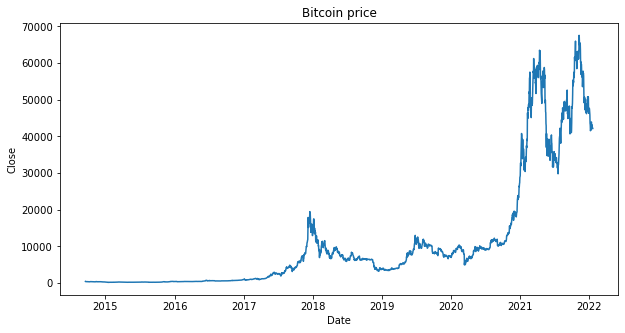

In [5]:
plt.figure(figsize=(10,5))
sns.lineplot(data.index, data.Close)
plt.title('Bitcoin price')

Check for stationary

In [6]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data.Close)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -1.10
5% Critical Value: -2.86
p-value: 0.71


In [7]:
#Since the p-value is above 0.05 I cananot reject the null hypothesis. Thus the data is not stationary, which can be also clearly seen on the chart above.
#I will also use the second test to check the stationarity of the data.

from statsmodels.tsa.stattools import kpss

result = kpss(data.Close)
print(result)
print('KPSS Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[3]['5%'])
print('p-value: %.2f' % result[1])

(5.4375909500345605, 0.01, 28, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS Test Statistic: 5.44
5% Critical Value: 0.46
p-value: 0.01


C:\Users\radek\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [8]:
'''
In the case of second test the final result is the same. The p-value is less than 0.05 so in thsi case I need to reject the null hypothesis and assume that the data is not stationary.'''

'\nIn the case of second test the final result is the same. The p-value is less than 0.05 so in thsi case I need to reject the null hypothesis and assume that the data is not stationary.'

Autocorrelation

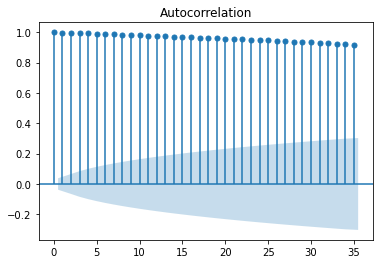

In [9]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
plot_acf(data.Close)
plt.show()

Partial autocorrelation

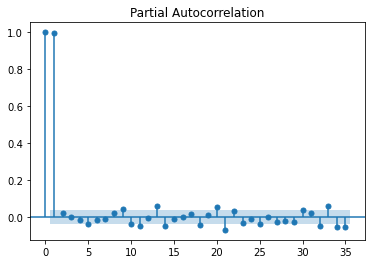

In [10]:
plot_pacf(data.Close)
plt.show()

In [11]:
'''
From the graphs above I can see that the data is autocorrelated, at least for first 35 logs.
'''

'\nFrom the graphs above I can see that the data is autocorrelated, at least for first 35 logs.\n'

Making data stationary

In [12]:
#First I will use diff method and invesitgate if it made data stationary
data['differ'] = data['Close'].diff()


In [13]:
data.head()

,Close,differ
Date,,
2014-09-17,457.334015,NaN
2014-09-18,424.440002,-32.894012
2014-09-19,394.795990,-29.644012
2014-09-20,408.903992,14.108002
2014-09-21,398.821014,-10.082977


Text(0.5, 1.0, 'Bitcoin price')

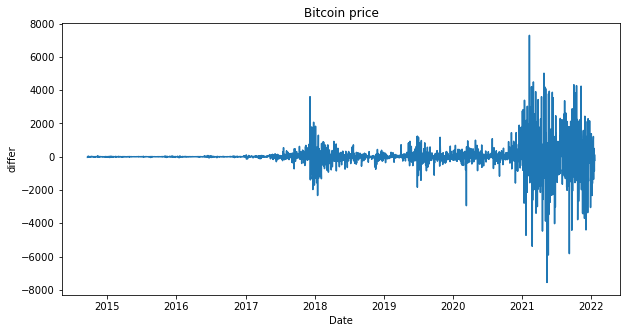

In [14]:
plt.figure(figsize=(10,5))
sns.lineplot(data.index, data.differ)
plt.title('Bitcoin price')

In [15]:
#Test
result = adfuller(data.differ.dropna())
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -8.38
5% Critical Value: -2.86
p-value: 0.00


In [16]:
'''
Now the p-value is less than 0.05 which allows me to reject the H0 hypothesis (H0: time series is not stationary) and I can ssume taht the data is stationary.
'''

'\nNow the p-value is less than 0.05 which allows me to reject the H0 hypothesis (H0: time series is not stationary) and I can ssume taht the data is stationary.\n'

Implementation of AR model

In [17]:
'''By looking at the partial autocorrelation I can see that the model should be of the first order'''
from statsmodels.tsa.arima_model import ARMA
mod_ar1 = ARMA(data.differ.dropna(), order=(1, 0))
res_ar1 = mod_ar1.fit()
print(res_ar1.summary())

                              ARMA Model Results                              
Dep. Variable:                 differ   No. Observations:                 2681
Model:                     ARMA(1, 0)   Log Likelihood              -21591.153
Method:                       css-mle   S.D. of innovations            760.866
Date:                Wed, 19 Jan 2022   AIC                          43188.306
Time:                        14:46:02   BIC                          43205.988
Sample:                    09-18-2014   HQIC                         43194.703
                         - 01-19-2022                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           15.5547     14.222      1.094      0.274     -12.320      43.430
ar.L1.differ    -0.0332      0.019     -1.722      0.085      -0.071       0.005
                                    Roots   

C:\Users\radek\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [18]:
mod_ar2 = ARMA(data.differ.dropna(), order=(10, 0))
res_ar2 = mod_ar2.fit()
print(res_ar2.summary())

C:\Users\radek\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                              ARMA Model Results                              
Dep. Variable:                 differ   No. Observations:                 2681
Model:                    ARMA(10, 0)   Log Likelihood              -21568.175
Method:                       css-mle   S.D. of innovations            754.353
Date:                Wed, 19 Jan 2022   AIC                          43160.350
Time:                        14:46:04   BIC                          43231.077
Sample:                    09-18-2014   HQIC                         43185.936
                         - 01-19-2022                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            15.5547     16.592      0.938      0.348     -16.964      48.074
ar.L1.differ     -0.0381      0.019     -1.980      0.048      -0.076      -0.000
ar.L2.differ      0.0112      0.019     

MA model

In [19]:
mod_ma1 = ARMA(data.differ.dropna(), order=(0, 1))
res_ma1 = mod_ma1.fit()
print(res_ma1.summary())

                              ARMA Model Results                              
Dep. Variable:                 differ   No. Observations:                 2681
Model:                     ARMA(0, 1)   Log Likelihood              -21591.168
Method:                       css-mle   S.D. of innovations            760.870
Date:                Wed, 19 Jan 2022   AIC                          43188.337
Time:                        14:46:07   BIC                          43206.019
Sample:                    09-18-2014   HQIC                         43194.733
                         - 01-19-2022                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           15.5547     14.212      1.095      0.274     -12.300      43.409
ma.L1.differ    -0.0329      0.019     -1.715      0.086      -0.070       0.005
                                    Roots   

C:\Users\radek\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [20]:
mod_ma2 = ARMA(data.differ.dropna(), order=(0, 10))
res_ma2 = mod_ma2.fit()
print(res_ma2.summary())

C:\Users\radek\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                              ARMA Model Results                              
Dep. Variable:                 differ   No. Observations:                 2681
Model:                    ARMA(0, 10)   Log Likelihood              -21565.705
Method:                       css-mle   S.D. of innovations            753.653
Date:                Wed, 19 Jan 2022   AIC                          43155.410
Time:                        14:46:09   BIC                          43226.137
Sample:                    09-18-2014   HQIC                         43180.996
                         - 01-19-2022                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            15.5547     16.809      0.925      0.355     -17.390      48.500
ma.L1.differ     -0.0370      0.019     -1.922      0.055      -0.075       0.001
ma.L2.differ      0.0230      0.019     

In [21]:
'''
From the cells above I can see that for both models MA and AR the order 1 is enought as the values of AIC and BIC for models of order 1 and 10 are almost the same. Thus for further comparison I will use these 2 models of order 1 and I will rerun them for train and test to compare them using errors.
'''

'\nFrom the cells above I can see that for both models MA and AR the order 1 is enought as the values of AIC and BIC for models of order 1 and 10 are almost the same. Thus for further comparison I will use these 2 models of order 1 and I will rerun them for train and test to compare them using errors.\n'

Comparison of models by predictions 

In [22]:
# I devide the data like 80% train 20% test:

train = data['differ'][0:int(len(data.differ)*0.8)]
test = data['differ'][int(len(data.differ)*0.8):]
print(len(train))
print(len(test))

2145
537


In [23]:
test.head()

Date
2020-08-01    436.125977
2020-08-02   -705.978516
2020-08-03    192.734375
2020-08-04    -40.456055
2020-08-05    541.129883
Name: differ, dtype: float64

In [24]:
#AR modle for train
mod_ar1 = ARMA(train.dropna(), order=(1, 0))
res_ar1 = mod_ar1.fit()
print(res_ar1.summary())

                              ARMA Model Results                              
Dep. Variable:                 differ   No. Observations:                 2144
Model:                     ARMA(1, 0)   Log Likelihood              -15160.431
Method:                       css-mle   S.D. of innovations            284.906
Date:                Wed, 19 Jan 2022   AIC                          30326.861
Time:                        14:46:11   BIC                          30343.873
Sample:                    09-18-2014   HQIC                         30333.086
                         - 07-31-2020                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.0682      6.278      0.807      0.419      -7.236      17.372
ar.L1.differ     0.0199      0.022      0.921      0.357      -0.022       0.062
                                    Roots   

C:\Users\radek\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [25]:
predictions_ar1 = res_ar1.predict(test.index[0],test.index[-1])

In [26]:
#Comparison of predictions and test
from statsmodels.tools.eval_measures import rmse
rmse_ar1 = rmse(test,predictions_ar1)
rmse_ar1

1603.0603858242634

In [27]:
#MA model for train
mod_ma1 = ARMA(train.dropna(), order=(0, 1))
res_ma1 = mod_ma1.fit()
print(res_ma1.summary())

                              ARMA Model Results                              
Dep. Variable:                 differ   No. Observations:                 2144
Model:                     ARMA(0, 1)   Log Likelihood              -15160.423
Method:                       css-mle   S.D. of innovations            284.905
Date:                Wed, 19 Jan 2022   AIC                          30326.846
Time:                        14:46:11   BIC                          30343.857
Sample:                    09-18-2014   HQIC                         30333.070
                         - 07-31-2020                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.0682      6.277      0.807      0.419      -7.235      17.372
ma.L1.differ     0.0202      0.022      0.929      0.353      -0.022       0.063
                                    Roots   

C:\Users\radek\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [28]:
#COmparison of predictions
predictions_ma1 = res_ma1.predict(test.index[0],test.index[-1])
rmse_ma1 = rmse(test,predictions_ma1)
rmse_ma1

1603.0602822768935

Comparison of MA and AR models

In [29]:
comparison_models = pd.DataFrame({'model': ['AR(1)','MA(1)'],'RMSE': [rmse_ar1, rmse_ma1], 'AIC': [res_ar1.aic, res_ma1.aic], 'BIC': [res_ar1.bic, res_ma1.bic]})
comparison_models

,model,RMSE,AIC,BIC
0,AR(1),1603.060386,30326.861406,30343.872691
1,MA(1),1603.060282,30326.845979,30343.857265


ARMA model optimization

In [45]:
def optimize_ARMA(order_list, exog):
    """
        Return dataframe with parameters and corresponding AIC
        
        order_list - list with (p, q) tuples
        exog - the exogenous variable
    """
    
    results = []
    
    for order in (order_list):
        try: 
            model = ARMA(exog, order=order).fit()
        except:
            continue
            
        aic = model.aic
        results.append([order, model.aic, model.bic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, q)', 'AIC', 'BIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [46]:

p = range(5)
q =range(5)
order_list = [(x,y) for x in p for y in q] 

In [47]:
len(order_list)

25

In [48]:
result_arma = optimize_ARMA(order_list, data.differ.dropna())

C:\Users\radek\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\radek\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\radek\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\radek\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\radek\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

In [61]:
result_arma

,"(p, q)",AIC,BIC
0,"(4, 4)",43144.191427,43203.130878
1,"(4, 2)",43167.084738,43214.236299
2,"(2, 4)",43167.118436,43214.269997
3,"(4, 3)",43169.084392,43222.129899
4,"(2, 2)",43172.011287,43207.374958
5,"(3, 3)",43175.074958,43222.226519
6,"(3, 4)",43176.026442,43229.071949
7,"(0, 4)",43186.719570,43222.083241
8,"(4, 0)",43187.830195,43223.193866
9,"(1, 4)",43188.129276,43229.386892


In [62]:
#The lowest BIC is observed for (0,0) model but I guess I will stick with the model that gives the best AIC which is ARMA(2,4)
result_arma[result_arma.BIC == result_arma.BIC.min()]

,"(p, q)",AIC,BIC
15,"(0, 0)",43189.270369,43201.058259


ARIMA optimization

In [50]:
def optimize_ARIMA(order_list, exog):
    """
        Return dataframe with parameters and corresponding AIC
        
        order_list - list with (p, d, q) tuples
        exog - the exogenous variable
    """
    
    results = []
    
    for order in (order_list):
        try: 
            model = ARIMA(exog, order=order).fit()
        except:
            continue
            
        aic = model.aic
        results.append([order, model.aic, model.bic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, d, q)', 'AIC', 'BIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [53]:
from statsmodels.tsa.arima_model import ARIMA

p=range(5)
q=range(5)
d=range(5)
order_list = [(x,y,z) for x in p for y in q for z in d] 

In [54]:
len(order_list)

125

In [55]:
result_arima = optimize_ARIMA(order_list, data.differ.dropna())

C:\Users\radek\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\radek\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\radek\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\radek\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\radek\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

In [56]:
#I see that the best results were obtained for the order (5,0,5), which is in fact ARMA model 
result_arima

,"(p, d, q)",AIC,BIC
0,"(2, 2, 4)",43132.333175,43179.478766
1,"(3, 1, 4)",43133.956161,43186.998310
2,"(4, 0, 4)",43144.191427,43203.130878
3,"(4, 1, 4)",43149.883915,43208.819636
4,"(4, 0, 2)",43167.084738,43214.236299
5,"(2, 0, 4)",43167.118436,43214.269997
6,"(4, 0, 3)",43169.084392,43222.129899
7,"(2, 0, 2)",43172.011287,43207.374958
8,"(3, 0, 3)",43175.074958,43222.226519
9,"(3, 0, 4)",43176.026442,43229.071949


In [58]:

result_arima[result_arima.BIC == result_arima.BIC.min()]

,"(p, d, q)",AIC,BIC
0,"(2, 2, 4)",43132.333175,43179.478766


In [63]:
result_arma[result_arma.AIC == result_arma.AIC.min()]

,"(p, q)",AIC,BIC
0,"(4, 4)",43144.191427,43203.130878


In [ ]:
'''
From the comparison of the two models above I see that the ARIMA model has lower values of both parameters AIC and BIC thus for my final prediction I will choose to use ARIMA model (2,2,4). Howerver, it is important to underline that the diffrences between models are not huge. Taht is why it might be better in a short period of time to use simpler models, as a compromise between compytation time and quality
'''

Prediction of bitcoin price

In [90]:
test_prediction = pd.date_range("2022-01-19", periods=6, freq="D")

In [91]:
test_prediction

DatetimeIndex(['2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22',
               '2022-01-23', '2022-01-24'],
              dtype='datetime64[ns]', freq='D')

In [64]:
#I will test model by the model ARIMA(2,2,4)
mod_arima224 = ARIMA(data.differ.dropna(), order=(2,2,4))
res_arima224 = mod_arima224.fit()
print(res_arima224.summary())


C:\Users\radek\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\radek\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\radek\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


                             ARIMA Model Results                              
Dep. Variable:              D2.differ   No. Observations:                 2679
Model:                 ARIMA(2, 2, 4)   Log Likelihood              -21558.167
Method:                       css-mle   S.D. of innovations            750.924
Date:                Wed, 19 Jan 2022   AIC                          43132.333
Time:                        16:00:04   BIC                          43179.479
Sample:                    09-20-2014   HQIC                         43149.389
                         - 01-19-2022                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.163e-06        nan        nan        nan         nan         nan
ar.L1.D2.differ    -0.4814      0.004   -116.697      0.000      -0.489      -0.473
ar.L2.D2.differ    -0.9807      

In [75]:
data.loc['2022-01-19 00:00:00', 'Close']

42159.57421875

In [74]:
predictions = res_arima224.predict(start='2022-01-19 00:00:00', end='2022-01-26 00:00:00')

In [83]:
price_20_01 = data.loc['2022-01-19 00:00:00', 'Close'] + predictions[1]

In [84]:
price_20_01

42377.02300211613

In [85]:
price_21_01 = price_20_01 + predictions[2]

In [86]:
def predictions_5(predictions):
	'''
	This function goes back to the price based on the values of diff predicted by the model
	'''
	result=[data.loc['2022-01-19 00:00:00', 'Close']]
	for i in range(1,6):
		result.append(result[-1]+predictions[i])
	return result

In [87]:
result = predictions_5(predictions)

In [88]:
result

[42159.57421875,
 42377.02300211613,
 43429.16931230648,
 42062.49452623974,
 41801.49925636776,
 43267.40145184783]

In [92]:
price_Bitcoin = pd.DataFrame({'Date': test_prediction, 'Price': result})

In [93]:
price_Bitcoin

,Date,Price
0,2022-01-19,42159.574219
1,2022-01-20,42377.023002
2,2022-01-21,43429.169312
3,2022-01-22,42062.494526
4,2022-01-23,41801.499256
5,2022-01-24,43267.401452


In [ ]:
'''
Basing on the Table below I would recomend to buy bitcoin today and sell it on 21st of January.
'''